# Observed Taylor law: variance vs mean 
**in protein coding gene length distributions for the different species**

## Import python modules

In [1]:
import numpy as np
#import matplotlib.pyplot as plt
from scipy import stats
#import os 
import pandas as pd
#import math
#
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

## The protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the gene length's distributions and the taxonomy ids

#### Statistical description 

In [2]:
# statistics on length distribution for different species
working_on_extra_path = "../../main_work/"
stat_file = working_on_extra_path + "../main_tables/stat_protCodGenes.tsv"
print("The statistical descriptions of the protein coding gene distributions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["division_8", "species", "trunk_genes_path", "genes_file", "count", "mean", "var"] + ["log10_mean", "log10_var"]]

# visualize data
pd.set_option('display.max_columns', None)
if 1:
    display(stat_df.head(2))
    print(stat_df.shape)

The statistical descriptions of the protein coding gene distributions for the different species is in:
 ../../main_work/../main_tables/stat_protCodGenes.tsv 



,division_8,species,trunk_genes_path,genes_file,count,mean,var,log10_mean,log10_var
0,archaea,methanobacterium_bryantii_gca_002287175,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_bryantii...,3168,840.404040,422343.848699,2.827684,0.082694
1,archaea,methanobacterium_formicicum_gca_000762265,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_formicic...,2352,862.427296,347239.612747,2.849723,0.076317


(33627, 9)


## Python functions

In [3]:
# species' stats for length distribution
def get_df_for_taxid(df, taxid):
     return df.loc[df["tax_id"]==taxid].copy()

In [4]:
def plot_taylor (df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression): 
    #Calculate best fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    #Format the regression text
    if 0: 
        print("v = {:4.4} * m^{:4.4};   R^2= {:2.4f}".format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.2} '.format(10**intercept)  + ' \t ' + '\mu^{' + '{:4.3}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.2f}$'.format(r_value**2)
    else:
        txt = ''
        
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.1) +
        geom_smooth(method="lm", color="green", size=0.25, span=.8)+
        labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=['#D83B01', '#002050', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']) # + scale_color_brewer() '#5C2D91'
        + labs(color='Clade') # legend title
        + scale_x_log10(breaks=[10 ** power for power in range(6)],
          limits=[min(df2plot[col_x].to_list())/2, 2*max(df2plot[col_x].to_list())]) 
        + scale_y_log10(breaks = [10**power for power in range(13)], 
          limits = [min(df2plot[col_y].to_list())/2,2*max(df2plot[col_y].to_list())])#, labels=scientific_format(digits=2)
    ) + theme(legend_position=(0.75,0.25), legend_key_size=5, legend_background=element_rect(fill='grey', alpha=0.01)) + annotate('text', x=0.015*max(df2plot[col_x].to_list()), y=0.65*max(df2plot[col_y].to_list()), label=txt,size=9,color="black")
    print(p)

#### Filter some species

In [5]:
if 1:
    print(stat_df.shape)
    print(stat_df["division_8"].value_counts())
cond = stat_df["division_8"].isin(["bacteria", "archaea","protists", "plants", "fungi", "metazoa", "vertebrates"])  # avoid: empty or viruses
stat_df = stat_df[cond]
stat_df = stat_df[stat_df["species"] != "mus_caroli"] # outlier
if 1:
    print(stat_df.shape)
    print(stat_df["division_8"].value_counts())

(33627, 9)
division_8
bacteria       30555
archaea         1228
fungi           1007
protists         237
vertebrates      221
metazoa          115
plants            96
Name: count, dtype: int64
(33458, 9)
division_8
bacteria       30555
archaea         1228
fungi           1007
protists         237
vertebrates      220
metazoa          115
plants            96
Name: count, dtype: int64


## Observations: variance vs. mean (represented in $log_{10}$ scale)
## Protein coding gene length distributions  
$\sigma^{2}$ is the variance   
$\mu$ is the mean  

(33458, 9)


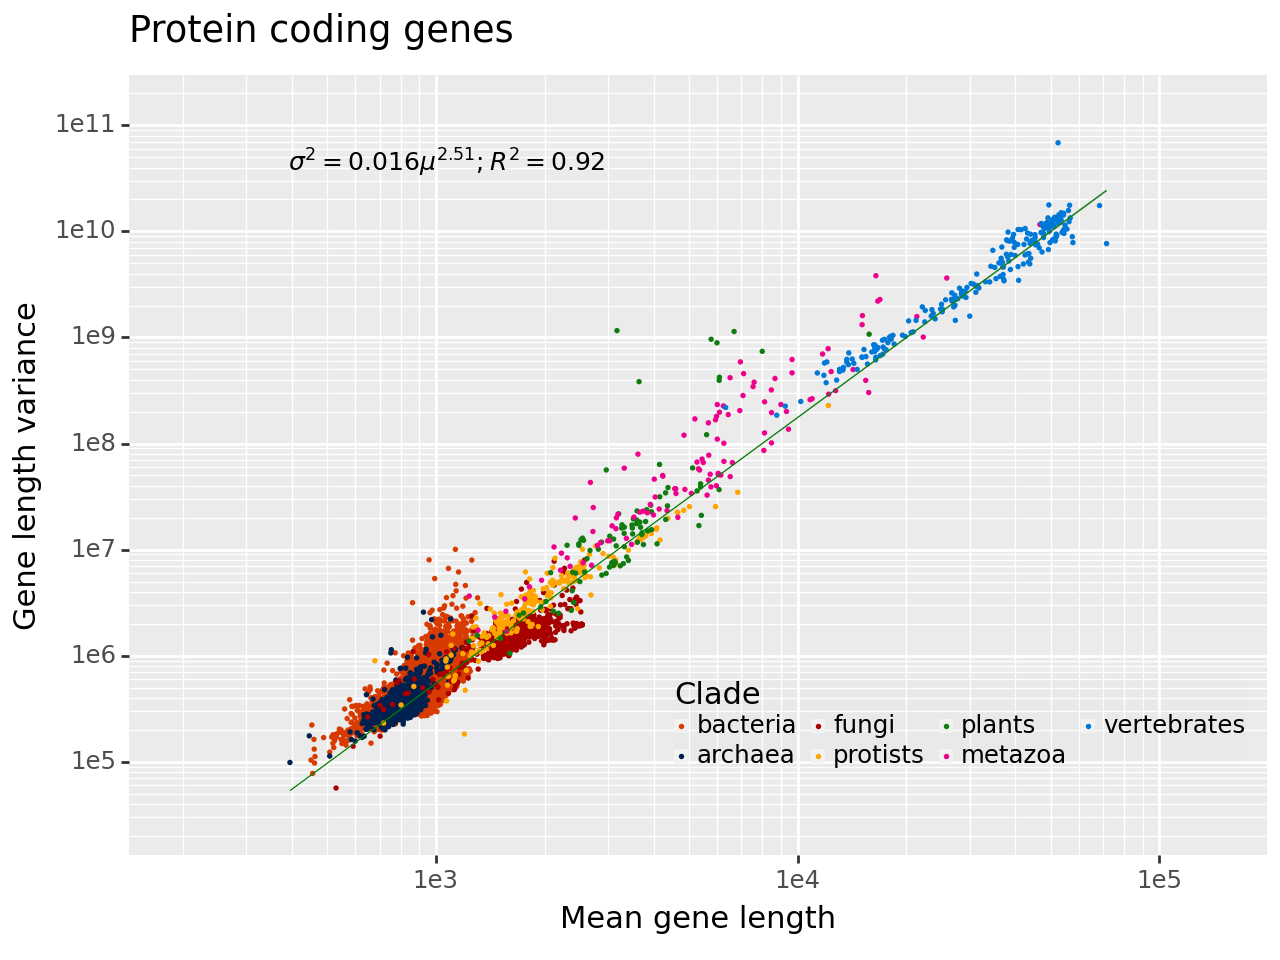

In [6]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_8"

title = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Gene length variance"
bool_show_regression = True

df2plot = stat_df
if 1:
    print(df2plot.shape)

# Sort division_8 in order to plot the clades in an order (everything can be displayed)
if 0:
    print(df2plot.division_8.unique())
df2plot.division_8 = pd.Categorical(df2plot.division_8, 
                                categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values('division_8', inplace=True)

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

#### Note:  
$\sigma^{2} = a . \mu^{\beta}$   
Because the regression line is:  
$\log(\sigma^{2}) = \log(a) + \beta log(\mu) $

# Analyze animalia vs rest of clades

In [7]:
def plot_taylor_by_clade (df2plot, col_x, col_y, x_lab, y_lab, title, clade, bool_show_regression): 
    #Calculate best fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    #Format the regression text
    if 1: 
        print("v = {:4.4} * m^{:4.4};   R^2= {:2.4f}".format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.2} '.format(10**intercept)  + ' \t ' + '\mu^{' + '{:4.3}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.2f}$'.format(r_value**2)
    else:
        txt = ''
    
    if clade in ["bacteria"]:
        transparency = 0.01
    elif clade in ["archaea"]:
        transparency = 1.
    else:
        transparency = 1.
        
    p = (   
        #ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.1) +
        ggplot(df2plot, aes(col_x, col_y)) + geom_point(size=0.05, alpha=transparency) +
        geom_smooth(method="lm", color="green", size=0.25, span=.8)+
        labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=['#D83B01', '#002050', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']) 
        #+ labs(color='Clade') # legend title
        + scale_x_log10(breaks=[10 ** power for power in range(6)],
          limits=[min(df2plot[col_x].to_list())/2, 2*max(df2plot[col_x].to_list())]) 
        + scale_y_log10(breaks = [10**power for power in range(13)], 
          limits = [min(df2plot[col_y].to_list())/2,2*max(df2plot[col_y].to_list())])#, labels=scientific_format(digits=2)
    ) #+ annotate('text', x=0.015*max(df2plot[col_x].to_list()), y=0.65*max(df2plot[col_y].to_list()), label=txt, size=9, color="black")
    print(p)

(33458, 9)
(33458, 10)
category
Other than Animalia    33123
Animalia                 335
Name: count, dtype: int64 

33123
division_8
bacteria       30555
archaea         1228
fungi           1007
protists         237
plants            96
metazoa            0
vertebrates        0
Name: count, dtype: int64 

v = 0.07916 * m^2.278;   R^2= 0.7027


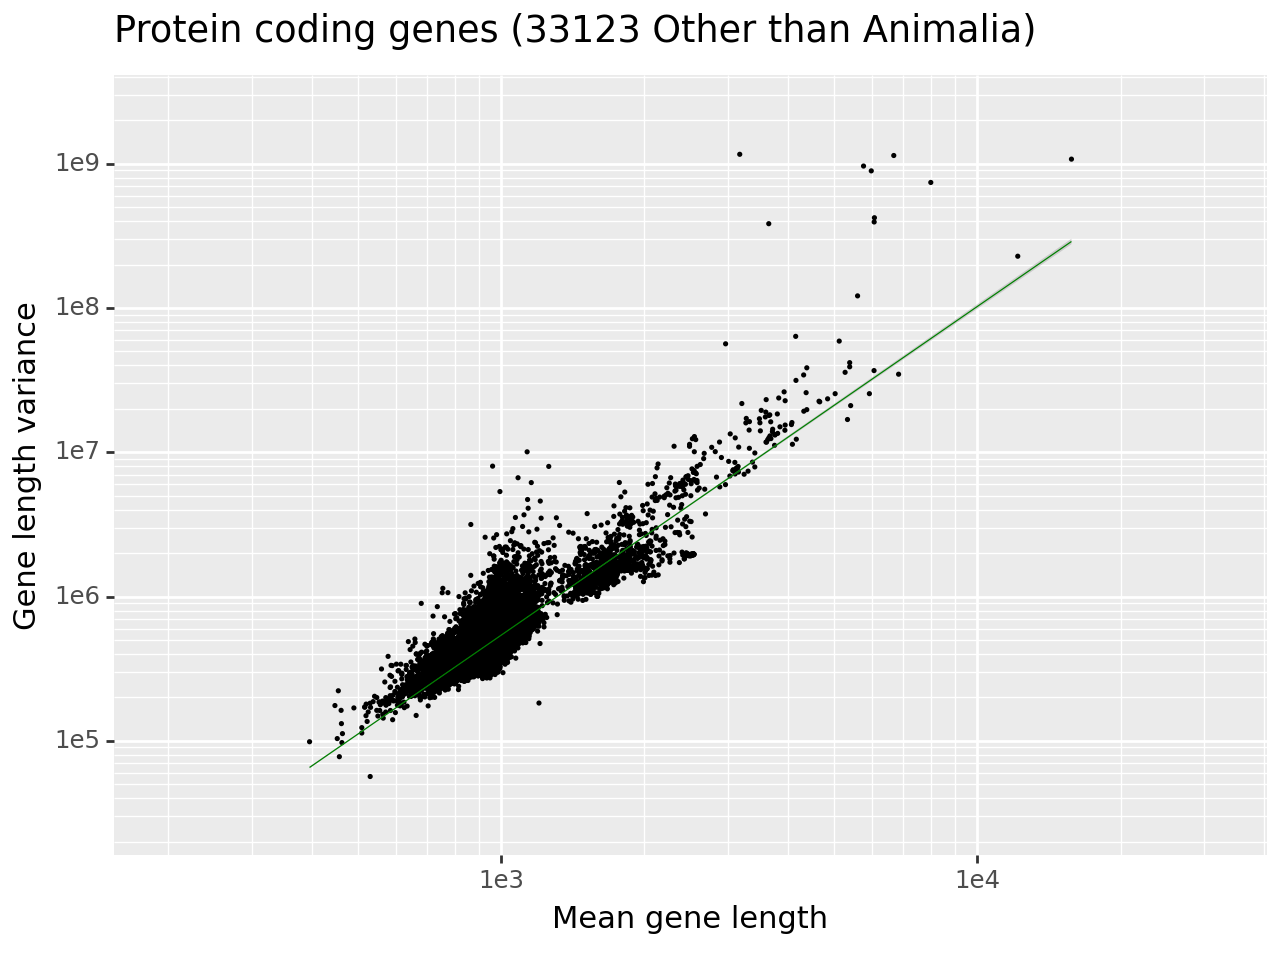

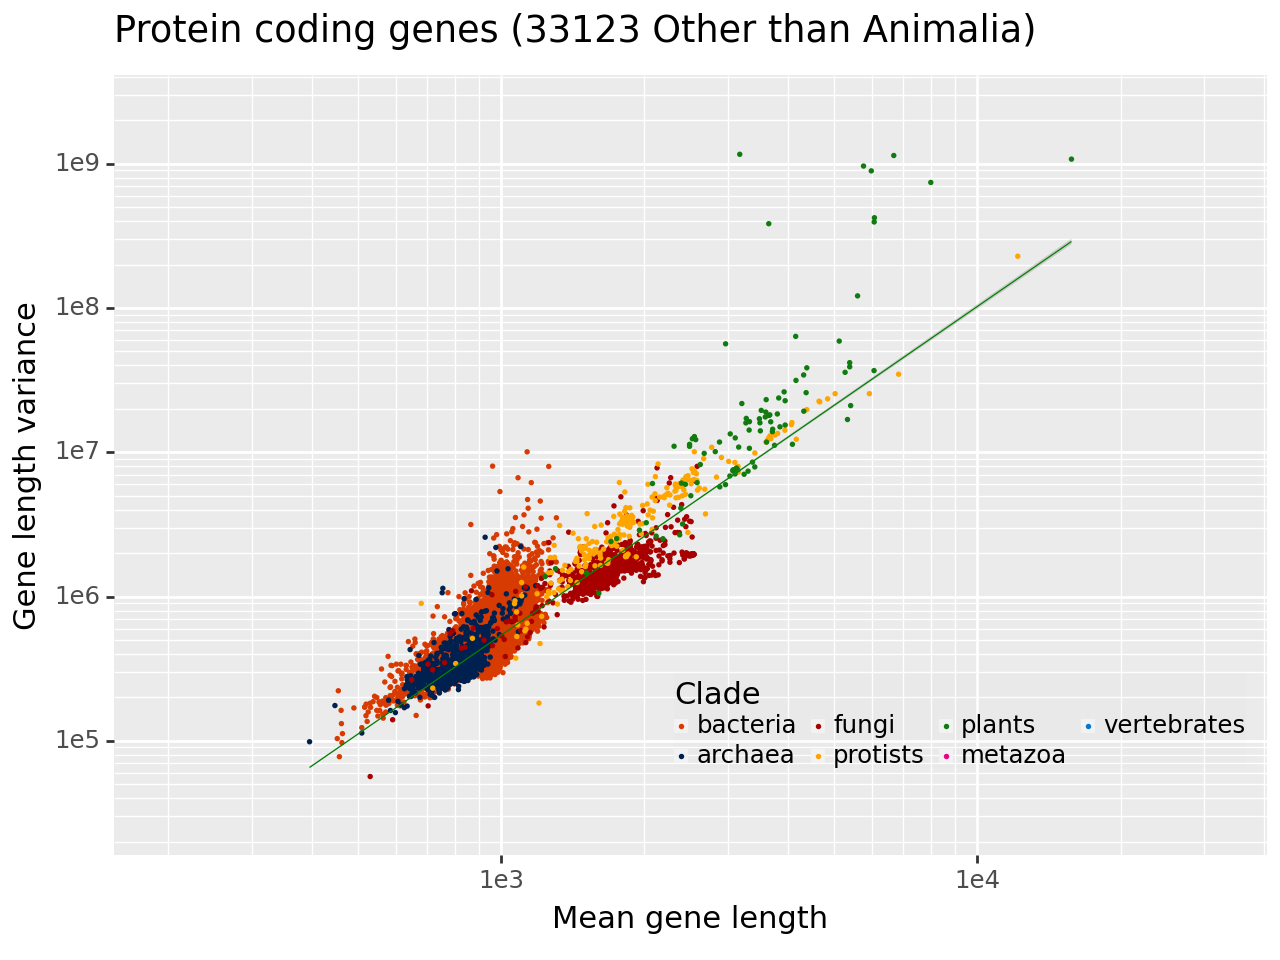


335
division_8
vertebrates    220
metazoa        115
bacteria         0
archaea          0
fungi            0
protists         0
plants           0
Name: count, dtype: int64 

v = 0.2233 * m^2.27;   R^2= 0.9686


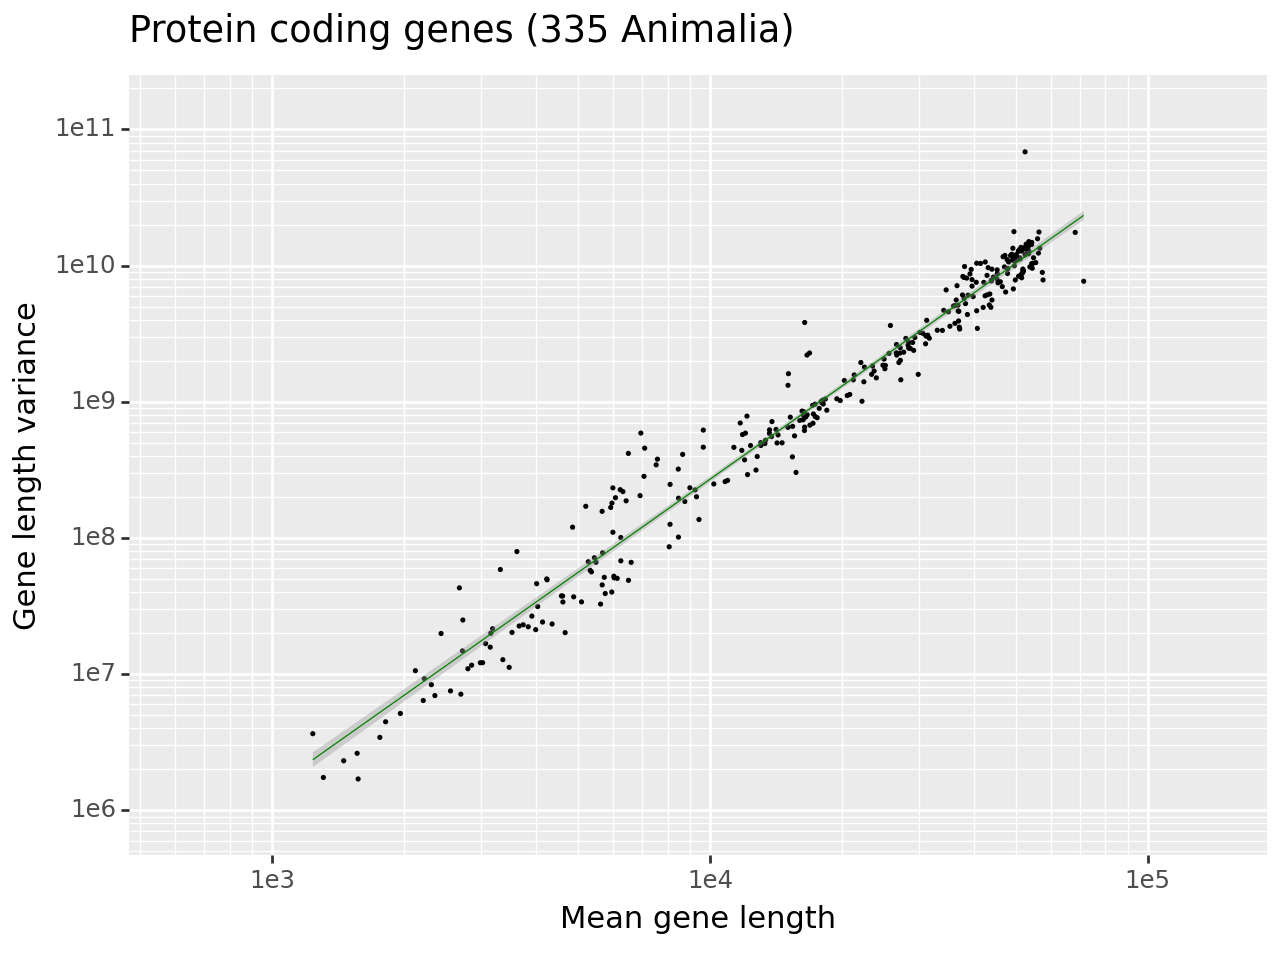

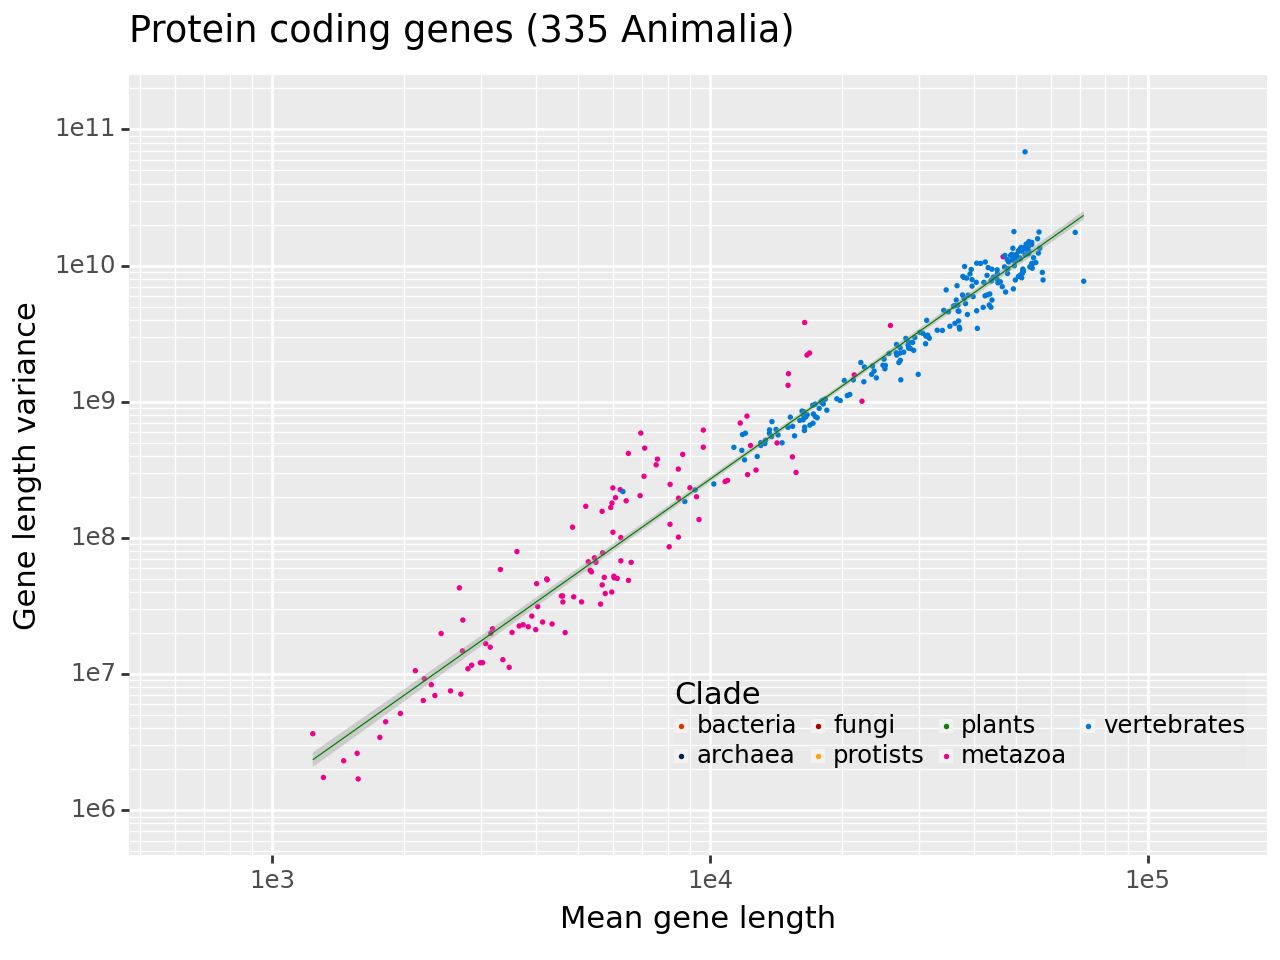

In [8]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_8"

title_template = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Gene length variance"
bool_show_regression = False

df      = stat_df.copy()
print(df.shape)
df['category'] = df['division_8'].map({'bacteria': 'Other than Animalia', 'archaea': 'Other than Animalia', 'plants': 'Other than Animalia', 
                                       'protists': 'Other than Animalia', 'fungi': 'Other than Animalia', 
                                       'metazoa': 'Animalia', 'vertebrates': 'Animalia'}).fillna('other')

if 1:
    print(df.shape)
    print(df['category'].value_counts(), "\n")

for cat in df["category"].unique().tolist(): # for each division
    df2plot = df[df["category"]==cat]
    if 1:
        print(df2plot.shape[0])
        print(df2plot['division_8'].value_counts(), "\n")
    if 1: # Set up to 1 for plotting by division 
        title = title_template + " (" + str(df2plot.shape[0]) + " " + str(cat) + ")"
        plot_taylor_by_clade(df2plot, col_x, col_y, x_lab, y_lab, title, cat, True) # False ->bool_show_regression = False
        plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)